# Analisis Exploratorio

In [1]:
# Importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train_labels = pd.read_csv('./data/train_labels.csv', low_memory=False)
df_train_values = pd.read_csv('./data/train_values.csv', low_memory=False)

In [3]:
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Preprocesamiento y limpieza de datos

In [5]:
df_buildings = pd.merge(df_train_labels, df_train_values, how='inner', on='building_id')
df_buildings.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_buildings.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

Vemos que no tenemos ningún tipo de nulos en ninguna de los features. Además, podemos optimizar el uso de memoria en todos los features teniendo en cuenta su valor máximo y mínimo, o si son categóricos o no.

In [7]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [8]:
# Conversion de tipos de datos
to_categorical = set(df_buildings.select_dtypes(include='object').columns.tolist())
to_bool = set([col for col in df_buildings.columns if 'has' in col])
to_numeric = set(df_buildings.select_dtypes(include='int64').columns.tolist()) - to_bool

for col in to_categorical:
    df_buildings[col] = df_buildings[col].astype('category')

for col in to_bool:
    df_buildings[col] = df_buildings[col].astype('bool')

for col in to_numeric:
    df_buildings[col] = pd.to_numeric(df_buildings[col], downcast='unsigned')


In [9]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  uint32  
 1   damage_grade                            260601 non-null  uint8   
 2   geo_level_1_id                          260601 non-null  uint8   
 3   geo_level_2_id                          260601 non-null  uint16  
 4   geo_level_3_id                          260601 non-null  uint16  
 5   count_floors_pre_eq                     260601 non-null  uint8   
 6   age                                     260601 non-null  uint16  
 7   area_percentage                         260601 non-null  uint8   
 8   height_percentage                       260601 non-null  uint8   
 9   land_surface_condition                  260601 non-null  category
 10  foundation_type                 

Algo que llama la atención es la columna *has_secondary_use*, que puede ser redundante teniendo en cuenta que además existen columnas de tipo especifico de
secondary use.

In [10]:
secondary_use = set([col for col in df_buildings.columns if 'has_secondary' in col])
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].shape[0]

231445

In [11]:
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].sum()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

Vemos que de los 231.445 edificios que no tienen un uso secundario, tampoco tiene un uso secundario especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* resulta redundante.

Ahora, vamos a analizar para los casos que SI tienen un uso secundario.

In [12]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].shape[0]

29156

In [13]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].drop(columns='has_secondary_use').sum().sum()

29713

Podemos apreciar que de los 29.156 edificios que tienen un uso secundario, tenemos 29.713 usos secundarios en total. Esta diferencia de 557 puede venir de que algunos edificios tengan más de un uso secundario especifico.

In [14]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]

In [15]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]
aux['sum_has_secondary_use'] = aux.sum(axis=1)
aux.head()

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,sum_has_secondary_use
5,True,False,False,False,False,False,False,False,False,False,1
20,True,False,False,False,False,False,False,False,False,False,1
26,True,False,False,False,False,False,False,False,False,False,1
45,False,False,True,False,False,False,False,False,False,False,1
57,True,False,False,False,False,False,False,False,False,False,1


In [16]:
aux.loc[aux['sum_has_secondary_use'] > 1, :].shape[0]

557

Finalmente, vemos que efectivamente, la diferencia hallada provenia de aquellos edificios que tienen mas de un uso especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* tambien resulta redundante.

Podemos eliminar dicha feature ya que no nos aporta nada.

In [17]:
df_buildings.drop('has_secondary_use', axis=1, inplace=True)

In [18]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  uint32  
 1   damage_grade                            260601 non-null  uint8   
 2   geo_level_1_id                          260601 non-null  uint8   
 3   geo_level_2_id                          260601 non-null  uint16  
 4   geo_level_3_id                          260601 non-null  uint16  
 5   count_floors_pre_eq                     260601 non-null  uint8   
 6   age                                     260601 non-null  uint16  
 7   area_percentage                         260601 non-null  uint8   
 8   height_percentage                       260601 non-null  uint8   
 9   land_surface_condition                  260601 non-null  category
 10  foundation_type                 

## Analisis por estructura de edificios

Comenzamos por un analisis cuantitativo, queremos ver que con qué material fueron construidos los edificios. Buscaremos analizar si dichos materiales tuvieron o no incidencia en el nivel de daño recibido; o si podemos agrupar los tipos de edificaciones en una determinada zona y ver si es posible determinar si alguna zona en particular recibió terremotos de mayor magnitud.

En una primera instancia, pensamos que dada las condiciones socioeconomicas de Nepal (y que estamos analizando en un contexto de daños a causa de terremotos) prevaleceria una gran cantidad de edificaciones construidas con piedra y madera acompañadas con barro como mortero. 

In [35]:
has_superstructure = set([col for col in df_buildings.columns if 'has_superstructure' in col])
only_superstructure = df_buildings.loc[:, has_superstructure]
only_superstructure.head()

,has_superstructure_rc_non_engineered,has_superstructure_cement_mortar_stone,has_superstructure_stone_flag,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,has_superstructure_rc_engineered,has_superstructure_mud_mortar_brick,has_superstructure_other,has_superstructure_mud_mortar_stone
0,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,True,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False


In [36]:
only_superstructure['superstructure_type'] = only_superstructure.idxmax(axis=1)
only_superstructure['superstructure_type'] = only_superstructure['superstructure_type'].map(lambda x: x.replace('has_superstructure_', ''))
only_superstructure.head()

,has_superstructure_rc_non_engineered,has_superstructure_cement_mortar_stone,has_superstructure_stone_flag,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,has_superstructure_rc_engineered,has_superstructure_mud_mortar_brick,has_superstructure_other,has_superstructure_mud_mortar_stone,superstructure_type
0,False,False,False,False,False,False,True,False,False,False,True,has_superstructure_adobe_mud
1,False,False,False,False,False,False,False,False,False,False,True,has_superstructure_mud_mortar_stone
2,False,False,False,False,False,False,False,False,False,False,True,has_superstructure_mud_mortar_stone
3,False,False,False,True,True,False,False,False,False,False,True,has_superstructure_timber
4,False,False,False,False,False,False,True,False,False,False,False,has_superstructure_adobe_mud


In [38]:
only_superstructure['superstructure_type'].value_counts(normalize=True)

mud_mortar_stone                      0.53
timber                                0.23
adobe_mud                             0.06
cement_mortar_brick                   0.05
rc_non_engineered                     0.04
stone_flag                            0.03
mud_mortar_brick                      0.03
cement_mortar_stone                   0.02
rc_engineered                         0.01
bamboo                                0.01
other                                 0.00
Name: superstructure_type, dtype: float64

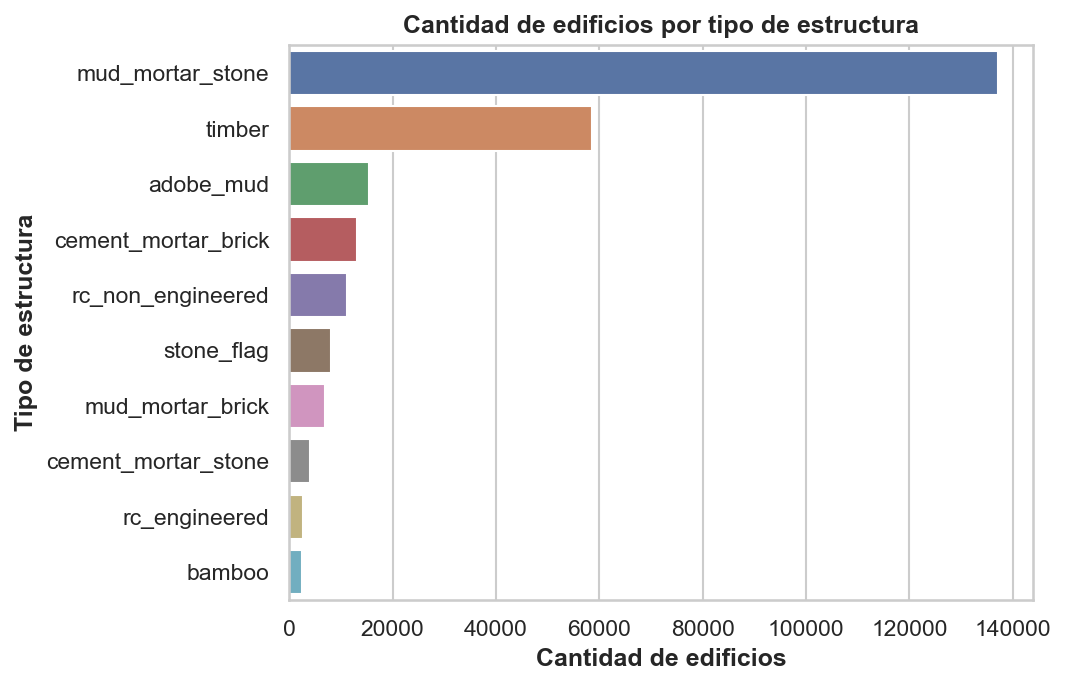

In [39]:
plt.figure(dpi=150)
sns.countplot(y='superstructure_type', data=only_superstructure, order=only_superstructure['superstructure_type'].value_counts()[:-1].index, orient='h')
plt.ylabel("Tipo de estructura", weight='bold')
plt.xlabel("Cantidad de edificios", weight='bold')
plt.title("Cantidad de edificios por tipo de estructura", weight='bold')
plt.show()

Podemos ver que la mayoria (53%) de las edificaciones fueron construidas con barro-piedra, 25% que construidas con Timber (madera especifica para construccion) seguido de un 6% con adobe-barro y un 5% con cemento-ladrillo.

A continuación, veremos si en estos 4 tipos de materiales podemos hallar algún tipo de incidencia respecto del daño recibido, ya que son las edificaciones con mayor cantidad de datos.

### ¿Cual fue el tipo de edificacion que se vio más afectada? ¿Cual fue la que menos fue afectada?

In [40]:
df_buildings['superstructure_type'] = only_superstructure['superstructure_type']
df_buildings.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,superstructure_type
0,802906,3,6,487,12198,2,30,6,5,t,...,False,False,False,False,False,False,False,False,False,adobe_mud
1,28830,2,8,900,2812,2,10,8,7,o,...,False,False,False,False,False,False,False,False,False,mud_mortar_stone
2,94947,3,21,363,8973,2,10,5,5,t,...,False,False,False,False,False,False,False,False,False,mud_mortar_stone
3,590882,2,22,418,10694,2,10,6,5,t,...,False,False,False,False,False,False,False,False,False,timber
4,201944,3,11,131,1488,3,30,8,9,t,...,False,False,False,False,False,False,False,False,False,adobe_mud


In [41]:
cantidad_por_tipo_y_danio = df_buildings.groupby(['superstructure_type', 'damage_grade']).agg({'superstructure_type': 'count'})\
                            .rename(columns={'superstructure_type': 'cantidad'})
cantidad_por_tipo_y_danio['porcentaje'] = (cantidad_por_tipo_y_danio / (cantidad_por_tipo_y_danio.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio.reset_index(inplace=True)
cantidad_por_tipo_y_danio.head()

,superstructure_type,damage_grade,cantidad,porcentaje
0,adobe_mud,1,387,2.50
1,adobe_mud,2,9269,59.94
2,adobe_mud,3,5809,37.56
3,bamboo,1,605,24.12
4,bamboo,2,1577,62.88


In [42]:
cantidad_por_tipo_y_danio

,superstructure_type,damage_grade,cantidad,porcentaje
0,adobe_mud,1,387,2.50
1,adobe_mud,2,9269,59.94
2,adobe_mud,3,5809,37.56
3,bamboo,1,605,24.12
4,bamboo,2,1577,62.88
5,bamboo,3,326,13.00
6,cement_mortar_brick,1,5035,38.29
7,cement_mortar_brick,2,7440,56.58
8,cement_mortar_brick,3,674,5.13
9,cement_mortar_stone,1,596,14.86


In [43]:
top_4_estructuras = only_superstructure['superstructure_type'].value_counts(normalize=True)[0:4].index.tolist()
top_4_estructuras_y_daño = cantidad_por_tipo_y_danio.loc[cantidad_por_tipo_y_danio['superstructure_type'].isin(top_4_estructuras), :]
top_4_estructuras_y_daño.head()

,superstructure_type,damage_grade,cantidad,porcentaje
0,adobe_mud,1,387,2.50
1,adobe_mud,2,9269,59.94
2,adobe_mud,3,5809,37.56
6,cement_mortar_brick,1,5035,38.29
7,cement_mortar_brick,2,7440,56.58


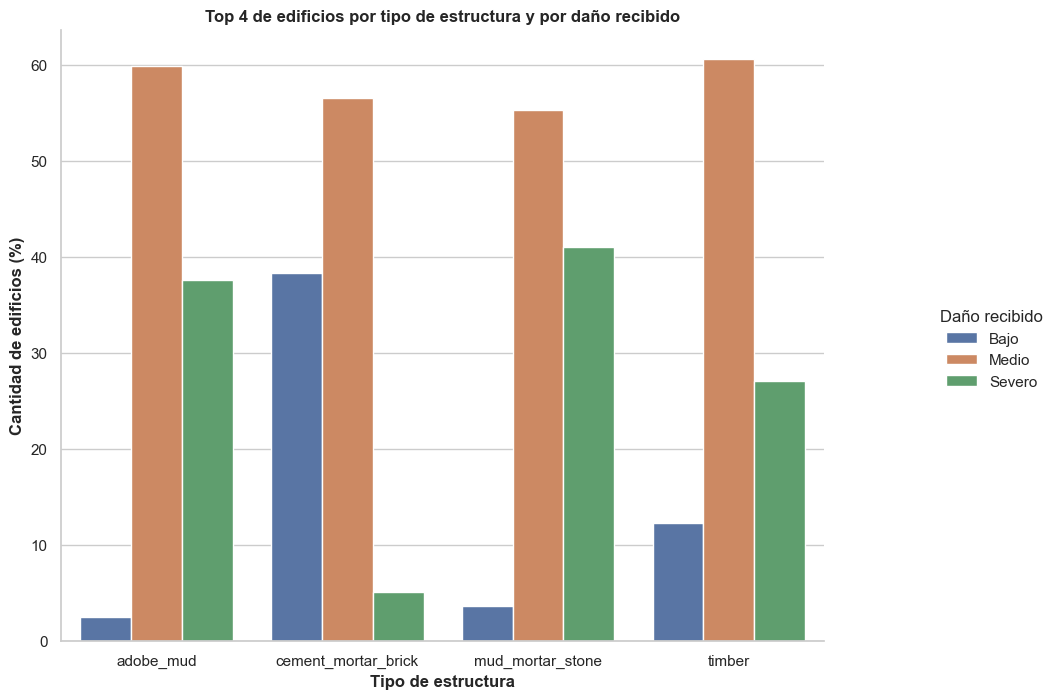

In [44]:
g = sns.catplot(x='superstructure_type', y='porcentaje', hue='damage_grade', kind='bar', data=top_4_estructuras_y_daño, orient='v')
g.fig.set_size_inches(11, 7)
g._legend.set_title('Daño recibido')
new_labels = ['Bajo', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
plt.ylabel('Cantidad de edificios (%)', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 4 de edificios por tipo de estructura y por daño recibido", weight='bold')
plt.show(g)

Podemos ver que quellas estructuras construidas con **barro-piedra, timber y barro-adobe** fueron las más afectadas, mientras que aquellas construidas con cemento-ladrillo fueron las que menos daño recibieron. Esto tiene sentido en aquellas viviendas basadas en el barro como mortero, pero es no lo es para aquellas que son construidas con timber, ya que dicho material suele ser resistente a daños sismicos. Sin embargo, esto nos puede mostrar que el nivel de intensidad de los terremotos fueron lo suficientemente fuerte como para dañar aquellas edificaciones con materiales preparados para tal eventos.

Es de suma importancia aclarar que, en funcion a la cantidad de datos registrados, se dejo de lado en esta comparacion a 3 tipos de edificaciones que, a priori, oserían las viviendas más y menos resistentes a un daño sismico. Los 3 tipos mencionados se compararan a continuacion

In [45]:
# Que pasa si comparamos aquellas con concreto reforzado no-diseñado/diseñado y con viviendas construidas con piedras?
for_comparison = ['stone_flag', 'rc_engineered', 'rc_non_engineered']
edificios_con_stone_y_rc = cantidad_por_tipo_y_danio.loc[cantidad_por_tipo_y_danio['superstructure_type'].isin(for_comparison), :]

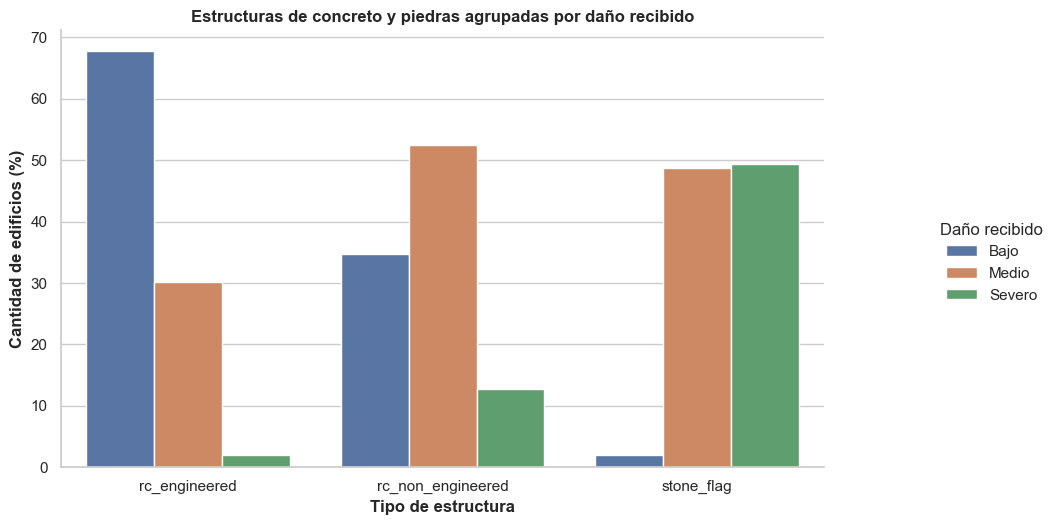

In [46]:
g = sns.catplot(x='superstructure_type', y='porcentaje', hue='damage_grade', kind='bar', data=edificios_con_stone_y_rc, orient='v')
g.fig.set_size_inches(11, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
plt.ylabel('Cantidad de edificios (%)', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Estructuras de concreto y piedras agrupadas por daño recibido", weight='bold')
plt.show(g)

Es evidente que dentro de este pequeño grupo, en concordancia con nuestra hipotesis, aquellas edificaciones con concreto reforzado son las que menos daños sufrieron mientras que aquellas fabricadas con solamente piedra fueron las que más daño recibieron.

In [53]:
df_buildings.groupby(['plan_configuration', 'damage_grade']).agg({'plan_configuration':'count'}).rename(columns={'plan_configuration': 'cantidad'}).reset_index()

,plan_configuration,damage_grade,cantidad
0,a,1,66
1,a,2,157
2,a,3,29
3,c,1,86
4,c,2,206
5,c,3,33
6,d,1,23310
7,d,2,142523
8,d,3,84239
9,f,1,0


In [49]:
df_buildings.groupby('position').agg({'plan_configuration':'count'}).rename(columns={'plan_configuration': 'cantidad'}).reset_index()

,position,cantidad
0,j,13282
1,o,2333
2,s,202090
3,t,42896


In [50]:
df_buildings.groupby('ground_floor_type').agg({'plan_configuration':'count'}).rename(columns={'plan_configuration': 'cantidad'}).reset_index()

,ground_floor_type,cantidad
0,f,209619
1,m,508
2,v,24593
3,x,24877
4,z,1004


In [51]:
df_buildings.groupby('other_floor_type').agg({'plan_configuration':'count'}).rename(columns={'plan_configuration': 'cantidad'}).reset_index()

,other_floor_type,cantidad
0,j,39843
1,q,165282
2,s,12028
3,x,43448


In [52]:
df_buildings.groupby('roof_type').agg({'plan_configuration':'count'}).rename(columns={'plan_configuration': 'cantidad'}).reset_index()

,roof_type,cantidad
0,n,182842
1,q,61576
2,x,16183


### ¿Los edificios con menor antiguedad sufrieron menos daños?

In [178]:
bins = [0, 50, 100, 150, 300, 500, 600, 700, 800, 900, 950]
age_by_bins = df_buildings['age'].value_counts(bins=bins).to_frame()
age_by_bins = age_by_bins.reset_index().rename(columns={'index': 'rango', 'age':'cantidad'})
age_by_bins = age_by_bins.loc[age_by_bins['cantidad'] > 0]
age_by_bins

,rango,cantidad
0,"(-0.001, 50.0]",242457
1,"(50.0, 100.0]",16020
2,"(100.0, 150.0]",595
3,"(150.0, 300.0]",139


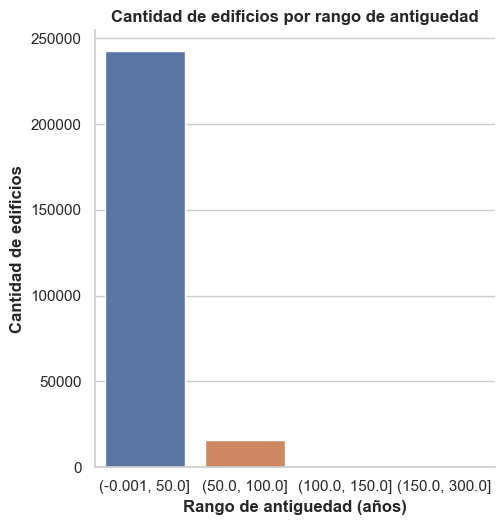

In [180]:
g = sns.catplot(x='rango', y='cantidad', kind='bar', data=age_by_bins, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel('Rango de antiguedad (años)', weight='bold')
plt.title("Cantidad de edificios por rango de antiguedad", weight='bold')
plt.show(g)

In [157]:
# Nos quedamos con los edificios con una antiguedad menor a 50 años para comparar debido a la poca cantidad de datos para age >= 50.
age_under_50 = df_buildings.loc[df_buildings['age'] <= 50, ['age', 'damage_grade']]
age_under_50 = age_under_50.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_under_50['porcentaje'] = (age_under_50 / (age_under_50.groupby(level=0).transform("sum"))) * 100
age_under_50.reset_index(inplace=True)

In [160]:
age_under_50.head()

,age,damage_grade,cantidad,porcentaje
0,0,1,7213,27.70
1,0,2,12721,48.85
2,0,3,6107,23.45
3,5,1,5590,16.59
4,5,2,19030,56.47


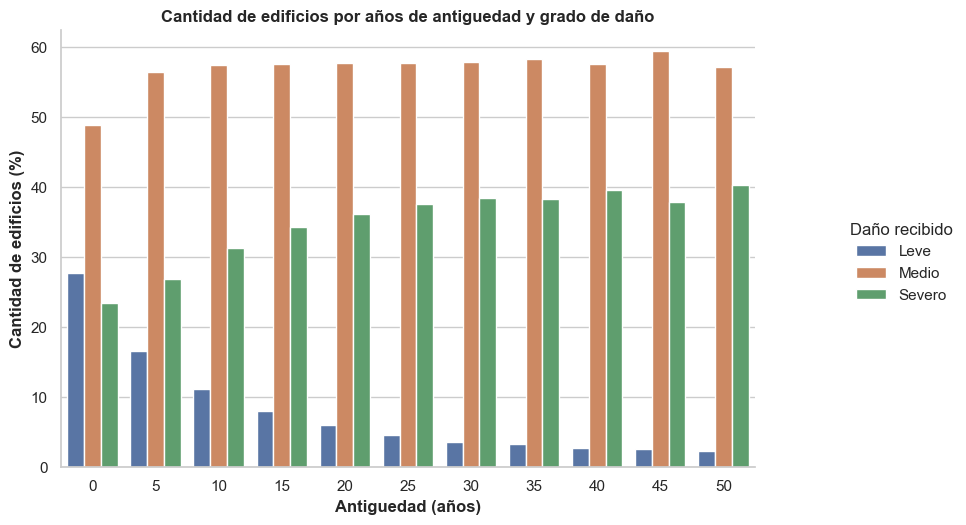

In [159]:
g = sns.catplot(x='age', y='porcentaje', hue='damage_grade', kind='bar', data=age_under_50, orient='v')
g.fig.set_size_inches(10, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
plt.ylabel("Cantidad de edificios (%)", weight='bold')
plt.xlabel('Antiguedad (años)', weight='bold')
plt.title("Cantidad de edificios por años de antiguedad y grado de daño", weight='bold')
plt.show()

Para el rango de 0-50 años de antiguedad, se puede ver que arriba del 50% de los edificios sufrieron un grado de daño de nivel medio, mientras que un porcentaje mayor al 30% sufrieron daño severo. Es interesante notar como a medida que la antiguedad va aumentando, la cantidad de edificios que sufrieron daños leves va disminuyendo al mismo tiempo que la cantidad de viviendas que sufrieron un daño grave va aumentando. Es decir, en general podemos decir que los edificios con menor antiguedad sufrieron menos daño.